In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '/ex1data1.txt'
df = pd.read_csv(path, header=None, names=['Population', 'Profit'])
#1
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
#2
x = df.values[:, 0]
y = df.values[:, 1]

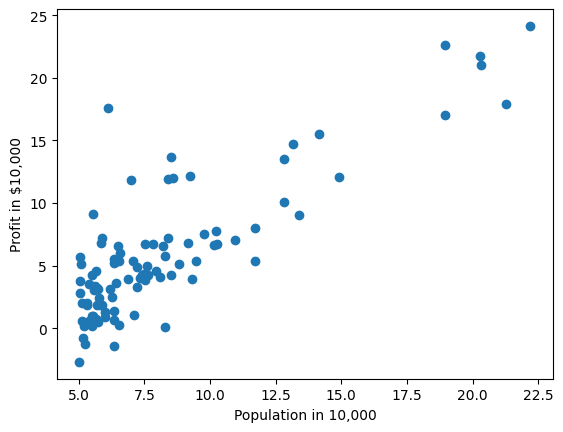

In [5]:
plt.scatter(x, y)
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.show()

In [6]:
#3
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)

In [7]:
#4
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [8]:
theta.shape

(2, 1)

In [9]:
#5
def computeCost(X, y, theta):
    f = theta.transpose() @ X
    m = f.size
    return (1/(2*m))*((f-y)**2).sum()
#6
computeCost(X, y, theta)

32.072733877455676

In [10]:
#7
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = np.zeros(it)
    m = y.size
    for i in range(it):
        h = theta.transpose() @ X
        for j in range(X.shape[0]):
            theta[j,0] -= alpha/m * ((h-y)*(x**j)).sum()
        # theta[0,0] -= alpha/m * (h-y).sum()
        # theta[1,0] -= alpha/m * ((h-y)*x).sum()
        cost[i] = computeCost(X, y, theta)
    return theta, cost

alpha = 0.01
it = 1000

In [11]:
#8
theta, cost = simple_gradient(X, y, theta, alpha, it)
theta

array([[-3.2414012],
       [ 1.1272942]], dtype=float32)

In [12]:
#9
computeCost(X, y, theta)

4.515955615224579

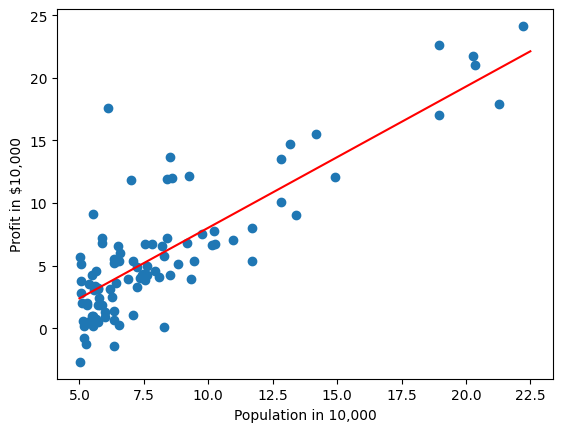

In [13]:
#10
plt.scatter(x, y)
x_val = np.linspace(5, 22.5)
y_val = theta[1] * x_val + theta[0]
plt.plot(x_val, y_val, "r")
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.show()

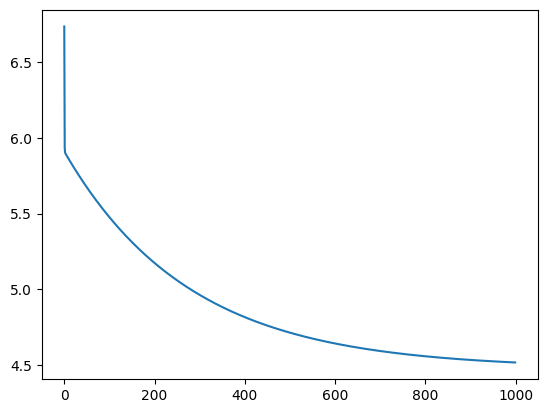

In [14]:
#11
plt.plot(range(it), cost)
plt.show()

In [15]:
path = os.getcwd() + '/ex1data2.txt'
df = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [16]:
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [17]:
#2
x = df.values[:, (0,1)]
y = df.values[:, 2]

In [18]:
#3
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)


In [19]:
X.shape

(2, 47, 2)

In [20]:
#4
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [21]:
theta.shape

(2, 1)

In [22]:
computeCost(X, y, theta)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 47 is different from 2)

In [ ]:
#8
alpha = 0.01
it = 1000
theta, cost = simple_gradient(X, y, theta, alpha, it)
theta